In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images
IMAGE_SIZE = [224, 224]

train_path = "Datasets/Train"
valid_path = "Datasets/Test"

In [3]:

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:

for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob('Datasets/Train/*')

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory("Datasets/Train",target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory("Datasets/Test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\dalwi\AppData\Local\Temp\ipykernel_23744\1167563505.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 27s 15s/step - loss: 4.7907 - accuracy: 0.3125 - val_loss: 11.4822 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 23s 16s/step - loss: 7.6448 - accuracy: 0.3438 - val_loss: 6.5217 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 21s 15s/step - loss: 3.3794 - accuracy: 0.3750 - val_loss: 2.2698 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 17s 12s/step - loss: 3.8148 - accuracy: 0.4531 - val_loss: 2.6339 - val_accuracy: 0.4138
Epoch 5/50
2/2 [==============================] - 21s 15s/step - loss: 3.4793 - accuracy: 0.4688 - val_loss: 1.1841 - val_accuracy: 0.5862
Epoch 6/50
2/2 [==============================] - 19s 13s/step - loss: 1.5861 - accuracy: 0.4219 - val_loss: 4.1075 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 22s 16s/step - loss: 2.4403 - accuracy: 0.4688 - val_loss: 2.9601 - val_accuracy: 0.3276
Epoch 8/50
2/2 [==========

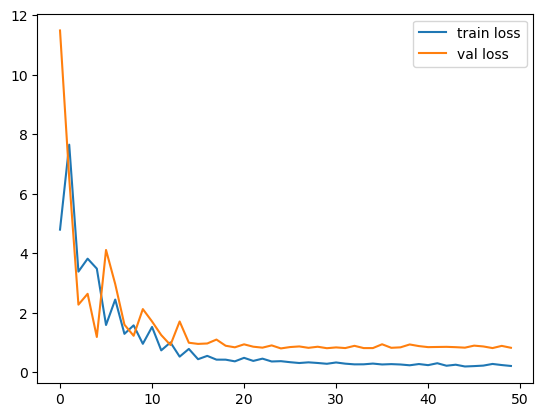

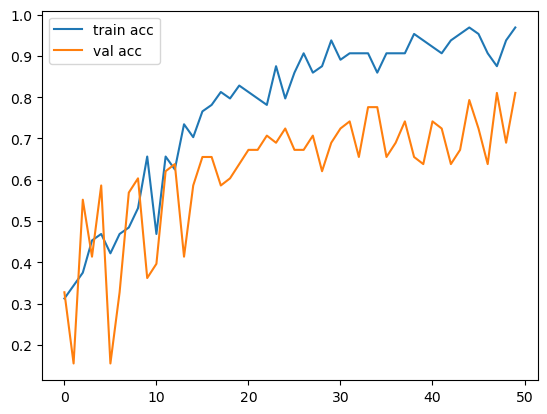

<Figure size 640x480 with 0 Axes>

In [15]:
# ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:
y_pred = model.predict(test_set)

2/2 [==============================] - 6s 1s/step


In [18]:
y_pred

array([[8.9064240e-04, 9.2775661e-01, 7.1352780e-02],
       [2.6650363e-05, 8.6618407e-04, 9.9910718e-01],
       [2.2428669e-02, 3.7373924e-01, 6.0383207e-01],
       [3.6673039e-02, 9.0998089e-01, 5.3346127e-02],
       [4.3936010e-02, 7.0554268e-01, 2.5052130e-01],
       [2.0408964e-01, 6.1347646e-01, 1.8243386e-01],
       [4.1475937e-02, 6.5646327e-01, 3.0206078e-01],
       [1.5424687e-01, 2.2528949e-01, 6.2046355e-01],
       [1.7567183e-03, 9.9424309e-01, 4.0001888e-03],
       [9.0786546e-02, 4.5321599e-02, 8.6389178e-01],
       [5.0196475e-01, 3.2309538e-01, 1.7493987e-01],
       [1.5467867e-02, 7.8069955e-01, 2.0383263e-01],
       [4.3911711e-04, 9.9818099e-01, 1.3799326e-03],
       [3.9365268e-03, 9.9587435e-01, 1.8912580e-04],
       [1.1414456e-04, 9.9780899e-01, 2.0768228e-03],
       [1.3855914e-02, 9.3332154e-01, 5.2822560e-02],
       [7.0206380e-01, 4.3808199e-02, 2.5412798e-01],
       [8.0702469e-02, 1.1208382e-03, 9.1817665e-01],
       [4.4791894e-03, 7.141

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [23]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [24]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [25]:
x.shape


(224, 224, 3)

In [26]:
x=x/255

In [27]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 [==============================] - 1s 615ms/step


array([[0.01766074, 0.16219601, 0.8201432 ]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 140ms/step


In [30]:
a==1

array([False])